In [4]:
import numpy as np
import pandas as pd
import csv
import random
import math
import operator
%matplotlib inline

In [5]:
data = pd.read_csv('./input/train.csv',)
data.head()

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [6]:
data.shape

(123, 7)

In [7]:
#檢查缺值
data.isnull().sum()

id      0
花萼長度    1
花萼寬度    1
花瓣長度    0
花瓣寬度    0
屬種      0
type    0
dtype: int64

In [9]:
#補足缺值
data['花萼長度'] = data['花萼長度'].fillna(data['花萼長度'].mean())
data['花萼寬度'] = data['花萼寬度'].fillna(data['花萼寬度'].mean())
data.isnull().sum()

id      0
花萼長度    0
花萼寬度    0
花瓣長度    0
花瓣寬度    0
屬種      0
type    0
dtype: int64

In [10]:
#顯示中文有問題 改成英文
data = data.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm','花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm'})
#黑白不好看 渲染一些顏色上去
color ={1:'r',2:'g',3:'b',4:'c'}
data['color'] = data['type'].map(color)
data.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,屬種,type,color
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1,r
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1,r
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1,r
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1,r
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1,r


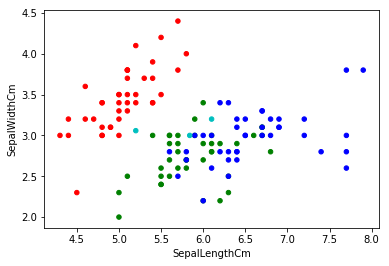

In [11]:
#查看花萼長度&花萼寬度分布 這邊有點雜
data.plot.scatter(x='SepalLengthCm',y='SepalWidthCm',c=data['color'])

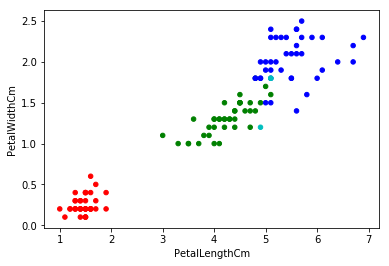

In [12]:
#查看花瓣長度&花瓣寬度分布 這邊就還蠻清楚的
data.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',c=data['color'])

In [13]:
#查看相關性 看起來PetalLengthCm&PetalWidthCm跟type相關性高
data.corr()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,type
id,1.000000,0.686136,-0.387099,0.879807,0.887936,0.944051
SepalLengthCm,0.686136,1.000000,-0.131922,0.860308,0.813901,0.735022
SepalWidthCm,-0.387099,-0.131922,1.000000,-0.436213,-0.367957,-0.390796
PetalLengthCm,0.879807,0.860308,-0.436213,1.000000,0.958595,0.921715
PetalWidthCm,0.887936,0.813901,-0.367957,0.958595,1.000000,0.918191
type,0.944051,0.735022,-0.390796,0.921715,0.918191,1.000000


In [14]:
# 將不需要的特徵值drop掉
x = data.drop(['id','屬種','type','color'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.4,3.7,1.5,0.2
1,4.8,3.4,1.6,0.2
2,4.8,3.0,1.4,0.1
3,4.3,3.0,1.1,0.1
4,5.8,4.0,1.2,0.2


In [15]:
#把type獨立出來
y = data['type']

In [23]:
# 將資料切分
from sklearn.model_selection import train_test_split
#八成訓練 二成測試
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [24]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
#分數
xgbc.score(x_test, y_test)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9354838709677419

In [29]:
test = pd.read_csv('./input/test.csv',)
test = test.rename(columns = {'花萼長度':'SepalLengthCm','花萼寬度':'SepalWidthCm',
                             '花瓣長度':'PetalLengthCm','花瓣寬度':'PetalWidthCm'})
test.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [30]:
#檢查缺值
test.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [31]:
test_feature = test.drop('id',axis=1)
predict = xgbc.predict(test_feature)

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
data = {'id':test['id'],'type':predict}

predicted_dataframe = pd.DataFrame(data=data)

In [35]:
predicted_dataframe.to_csv('./output/Submission.csv', index=False)